<img height="150" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="350"/>

In [6]:
import os
from warnings import filterwarnings

import pandas as pd
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

from util.gasph_letras import letras

filterwarnings('ignore')

path = os.path.join(os.getcwd(), 'data', "DADOS_ARTIGO_AMENDOIM.xlsx")
df = pd.read_excel(path, "Dados_finais")

# Dias de Ciclo (DC)

In [7]:
# Teste de normalidade (Shapiro-Wilk = 95%)
pg.normality(df,dv="DC", group="Cultivar",method='shapiro',alpha=0.05)

,W,pval,normal
Cultivar,,,
C1,1.0,1.0,True
C2,1.0,1.0,True
C3,1.0,1.0,True
C4,1.0,1.0,True
C5,1.0,1.0,True
C6,1.0,1.0,True
C7,1.0,1.0,True
C8,1.0,1.0,True
C9,1.0,1.0,True


In [8]:
pg.homoscedasticity(df, dv="DC", group="Rep")

,W,pval,equal_var
levene,0.0,1.0,True


In [9]:
# Coeficiente de variação geral
cv = df["DC"].std() / df["DC"].mean()
cv_percentage = cv * 100
print("Coeficiente de variação (%) \n", cv_percentage.round(2))

Coeficiente de variação (%) 
 7.95


In [10]:
modelo = ols("DC ~ Cultivar + Rep", data=df, missing='drop').fit()
resultado = sm.stats.anova_lm(modelo, typ=2)
resultado["decisao"] = resultado["PR(>F)"].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

,sum_sq,df,F,PR(>F),decisao
Cultivar,1.244858e+06,21.0,2.109556e+28,0.000000,Rejeitar H0
Rep,8.521044e-24,2.0,1.516189e+00,0.219595,Aceitar H0
Residual,2.960638e-20,10536.0,NaN,NaN,Aceitar H0


F value: 21095560767075221682325028864.000, p value: 0.000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
    C1    C10    -24.0   0.0 -24.0 -24.0   True
    C1    C11      4.0   0.0   4.0   4.0   True
    C1    C12    -16.0   0.0 -16.0 -16.0   True
    C1    C13    -19.0   0.0 -19.0 -19.0   True
    C1    C14    -29.0   0.0 -29.0 -29.0   True
    C1    C15    -32.0   0.0 -32.0 -32.0   True
    C1    C16    -25.0   0.0 -25.0 -25.0   True
    C1    C17    -25.0   0.0 -25.0 -25.0   True
    C1    C18    -29.0   0.0 -29.0 -29.0   True
    C1    C19    -39.0   0.0 -39.0 -39.0   True
    C1     C2    -18.0   0.0 -18.0 -18.0   True
    C1    C20    -30.0   0.0 -30.0 -30.0   True
    C1    C21    -16.0   0.0 -16.0 -16.0   True
    C1    C22    -10.0   0.0 -10.0 -10.0   True
    C1     C3    -10.0   0.0 -10.0 -10.0   True
    C1     C4    -13.0   0.0 -13.0 -13.0   True
    C1     C5    -19.0  

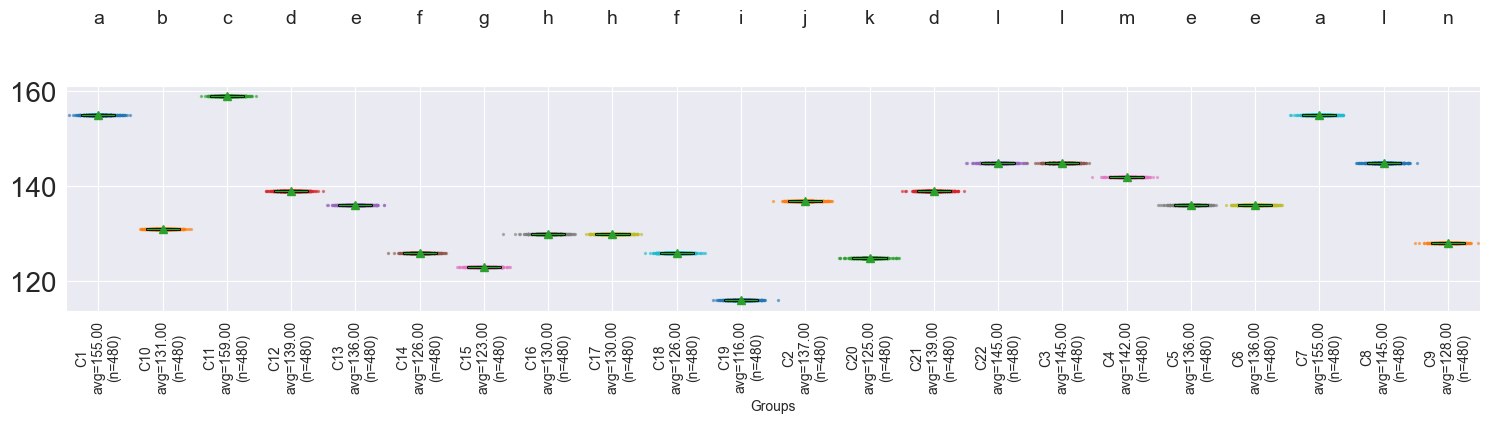

In [11]:
# Preparação dos dados p/ tukey:
data = pd.DataFrame(dict(Groups=df.Cultivar, Data=df.DC))

#Camando o módulo 'letras' para realizar o teste de tukey
letras(resultado, data, 0.05)

F value: 21095560767075221682325028864.000, p value: 0.000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    B1     B2      0.0   1.0 -0.6067 0.6067  False
    B1     B3      0.0   1.0 -0.6067 0.6067  False
    B2     B3      0.0   1.0 -0.6067 0.6067  False
--------------------------------------------------


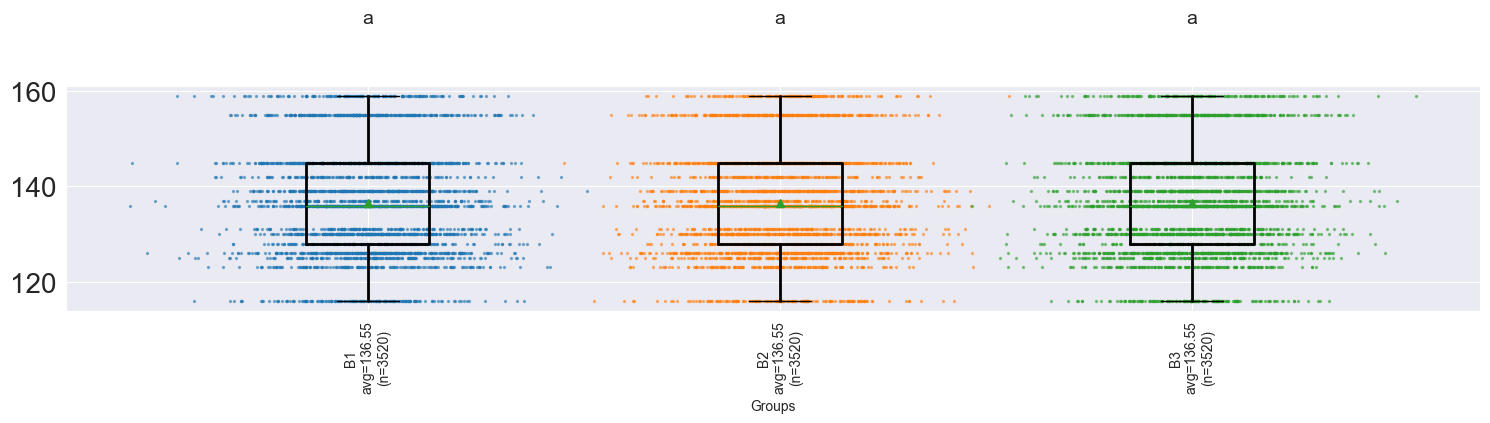

In [12]:
# Preparação dos dados p/ tukey:
data = pd.DataFrame(dict(Groups=df.Rep, Data=df.DC))

#Camando o módulo 'letras' para realizar o teste de tukey
letras(resultado, data, 0.05)

In [13]:
# Preparação dos dados p/ tukey:
data = pd.DataFrame(dict(Groups=df.Cultivar+"/"+df.Rep, Data=df.DC))

#Camando o módulo 'letras' para realizar o teste de tukey
##letras(resultado, data, 0.05)

F value: 21095560767075221682325028864.000, p value: 0.000

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
 C1/B1  C1/B2      0.0   nan   0.0   0.0  False
 C1/B1  C1/B3      0.0   nan   0.0   0.0  False
 C1/B1 C10/B1    -24.0   0.0 -24.0 -24.0   True
 C1/B1 C10/B2    -24.0   0.0 -24.0 -24.0   True
 C1/B1 C10/B3    -24.0   0.0 -24.0 -24.0   True
 C1/B1 C11/B1      4.0   0.0   4.0   4.0   True
 C1/B1 C11/B2      4.0   0.0   4.0   4.0   True
 C1/B1 C11/B3      4.0   0.0   4.0   4.0   True
 C1/B1 C12/B1    -16.0   0.0 -16.0 -16.0   True
 C1/B1 C12/B2    -16.0   0.0 -16.0 -16.0   True
 C1/B1 C12/B3    -16.0   0.0 -16.0 -16.0   True
 C1/B1 C13/B1    -19.0   0.0 -19.0 -19.0   True
 C1/B1 C13/B2    -19.0   0.0 -19.0 -19.0   True
 C1/B1 C13/B3    -19.0   0.0 -19.0 -19.0   True
 C1/B1 C14/B1    -29.0   0.0 -29.0 -29.0   True
 C1/B1 C14/B2    -29.0   0.0 -29.0 -29.0   True
 C1/B1 C14/B3    -29.0  

KeyboardInterrupt: 